<a href="https://colab.research.google.com/github/eduarda-mota/incendios-florestais/blob/main/Projeto_Inc%C3%AAndios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A análise dos incêndios florestais no Brasil (de 1997 a 2017) foi realizada utilizando dados obtidos de uma planilha do Excel.

https://drive.google.com/file/d/16PCjsLZuxmvxa0LlnTzCELbLVQhO37vN/view?usp=sharing

In [ ]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Leitura dos dados
dados = pd.read_csv('Dados_Indendio.csv', encoding='latin-1')

In [ ]:
dados.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
# Campos nulos
dados.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [ ]:
# Estatística
dados.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [ ]:
# Informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
# Valores únicos
dados.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

### **Curva anual de incêndios no Brasil de 1997 a 2017**

In [ ]:
# Análise do número de incêndios por ano
analise = dados.groupby(by=['year']).sum().reset_index()
analise.head()

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600


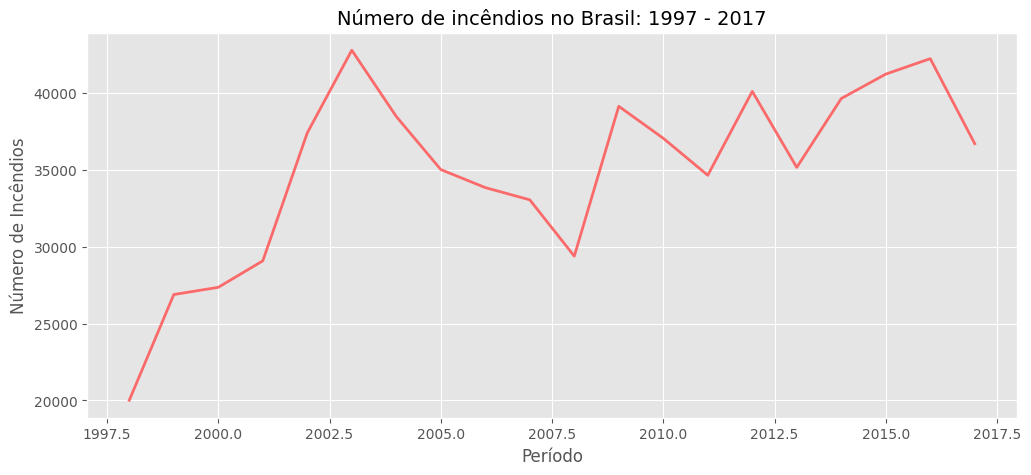

In [ ]:
# Tamanho da figura
plt.figure(figsize=(12, 5))

# Estilo
plt.style.use('ggplot')

# Título e Gráfico
plt.title('Número de incêndios no Brasil: 1997 - 2017', loc='center', fontsize=14)
sns.lineplot(data=analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85)

# Labels
plt.xlabel('Período')
plt.ylabel('Número de Incêndios');

### **Meses com maior número de queimadas**

In [ ]:
# Análise mensal
analise2 = dados.groupby(by=['year', 'month']).sum().reset_index()
analise2.head()

,year,month,number
0,1998,Abril,0.000
1,1998,Agosto,3964.616
2,1998,Dezembro,2043.407
3,1998,Fevereiro,0.000
4,1998,Janeiro,0.000


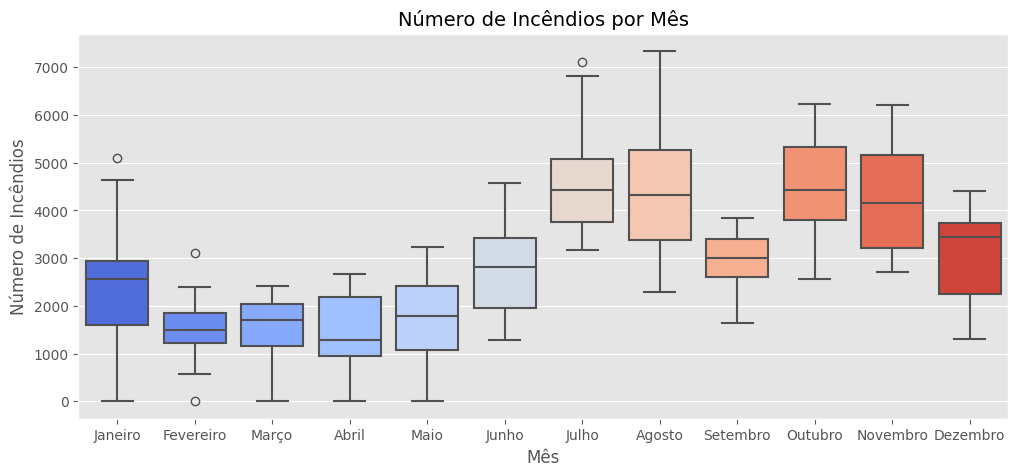

In [ ]:
# Tamanho da figura
plt.figure(figsize=(12, 5))

# Título e Gráfico
plt.title('Número de Incêndios por Mês', loc='center', fontsize=14)
sns.boxplot(data=analise2, x='month', y='number', palette='coolwarm', saturation=1, width=0.8, linewidth=1.5,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

# Labels
plt.xlabel('Mês')
plt.ylabel('Número de Incêndios');

Fica claro que os meses referentes ao segundo semestre são os meses com maior número de queimadas.

### **Estados com maior número de queimadas**

In [ ]:
# Análise por estado
analise3 = dados.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending=False)
analise3.head()

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226


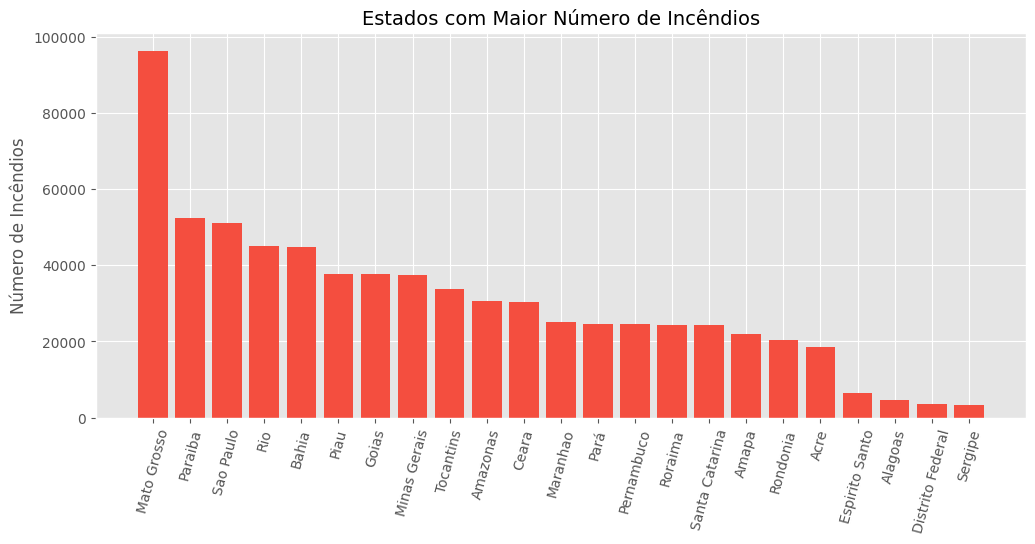

In [ ]:
# Tamanho da figura
plt.figure(figsize=(12, 5))

# Título e Gráfico
plt.title('Estados com Maior Número de Incêndios', loc='center', fontsize=14)
plt.bar(analise3.state, analise3['number'], color='#f44e3f')

# Labels
plt.ylabel('Número de Incêndios')
plt.xticks(rotation=75);

Mato Grosso é o estado com maior número de queimadas.

### **Análise dos top 5 estados com maior número de incêndios**

In [ ]:
# Top 5 estados com maior número de incêndios
top5 = analise3['state'][0:5].values
top5

array(['Mato Grosso', 'Paraiba', 'Sao Paulo', 'Rio', 'Bahia'],
      dtype=object)

In [ ]:
# Paleta com 5 cores (lista)
paleta_cores = sns.color_palette('husl', 5)
paleta_cores

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522)]

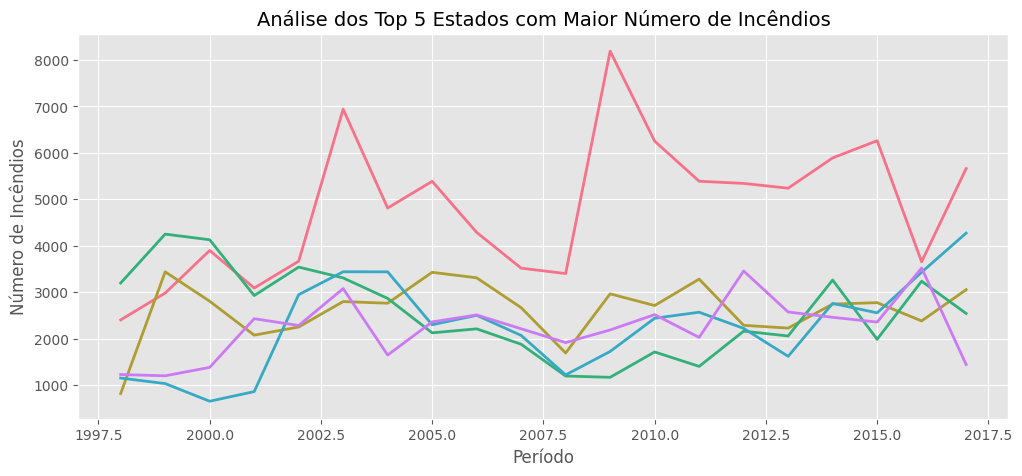

In [ ]:
# Tamanho da figura
plt.figure(figsize=(12, 5))

# Título
plt.title('Análise dos Top 5 Estados com Maior Número de Incêndios', loc='center', fontsize=14)

# Acessando a paleta
x=0

# Loop
for estado in top5:

  # Filtrando pelo estado
  filtro = dados.loc[dados['state'] == estado]

  # Agrupando pelo ano, realizando uma soma
  analise_local = filtro.groupby(by=['year']).sum().reset_index()

  # Plot
  sns.lineplot(data=analise_local, x='year', y='number', lw=2, color=paleta_cores[x])

  # Acessando próxima cor da paleta
  x=x+1

# Labels
plt.xlabel('Período')
plt.ylabel('Número de Incêndios');

### **Plotagem geográfica dos incêndios**

In [ ]:
# Plot Geográfico

# Estados em ordem alfabética
estados = analise3.sort_values('state')['state'].values

# Valor de cada estado
valores = analise3.sort_values('state')['number'].values

# Latitudes
lat = [-8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25]

# Longitudes
log = [-70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25]

# Organizando os dados
dicionario = {
    'Estados' : estados,
    'Latitude' : lat,
    'Longitude' : log,
    'Incêndios' : valores
}

# Lendo o dicionário
analise_geografica = pd.DataFrame(dicionario)
analise_geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [ ]:
# Importação de biblioteca
import plotly.express as px

# Mapa de calor geográfico
px.density_mapbox(
    analise_geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)